<a href="https://colab.research.google.com/github/srujanakodati20/ipl-data-analysis/blob/main/ipl_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INDIAN PREMIER LEAGUE(2008-2019)
Indian Premier League is the india best carnival or best festival.India in probably always played matches on march to jun but that time covid-19 pandemic due to ipl going to play in dubai and date is 19-september to 10-november.

##Loading required Python packages and Datasets



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
#Load datasets by giving path or mounting from drive
deliveries_df=pd.read_csv('./drive/MyDrive/deliveries.csv')
matches_df=pd.read_csv('./drive/MyDrive/matches.csv')

##Data preparation and cleaning

In [ ]:
#Here some Teams name are change with the time of the season that's why change the name of of team

# 1)Rising Pune Supergiants : Rising Pune Supergiant
# 2)Delhi Daredevils : Delhi Capitals
matches_df.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
matches_df.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)
matches_df.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals'},inplace=True)



##Some basic stats and info


In [ ]:
matches_df.shape
(636, 18)
deliveries_df.shape

(51149, 21)

In [ ]:
matches_df.info()
deliveries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [ ]:
#How many seasons we’ve got in the dataset?
len(matches_df['Season'].unique())

#How many matches we’ve got in the dataset?
matches_df['id'].max()

matches_df.head()
deliveries_df.head()










,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN
5,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,6,S Dhawan,DA Warner,TS Mills,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
6,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,7,S Dhawan,DA Warner,TS Mills,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN
7,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,1,S Dhawan,DA Warner,A Choudhary,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
8,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,2,DA Warner,S Dhawan,A Choudhary,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
9,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,2,3,DA Warner,S Dhawan,A Choudhary,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,NaN,NaN,NaN


##Which Team had won by maximum wickets?

In [ ]:

matches_df.iloc[matches_df['win_by_wickets'].idxmax()]['winner']
'Kolkata Knight Riders'

##Which season had most number of matches?

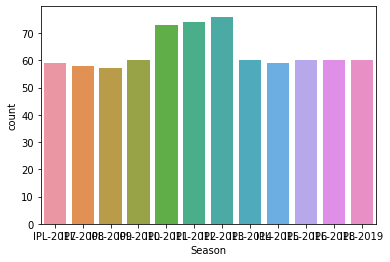

In [ ]:
sns.countplot(x='Season', data=matches_df)
plt.show()

##Most IPL Matches played in a Venue

In [ ]:
matches_df.groupby(['venue','id']).count().droplevel(level=1).index.value_counts()

Eden Gardens                                            77
Wankhede Stadium                                        73
M Chinnaswamy Stadium                                   73
Feroz Shah Kotla                                        67
Rajiv Gandhi International Stadium, Uppal               56
MA Chidambaram Stadium, Chepauk                         49
Sawai Mansingh Stadium                                  47
Punjab Cricket Association Stadium, Mohali              35
Maharashtra Cricket Association Stadium                 21
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Kingsmead                                               15
Punjab Cricket Association IS Bindra Stadium, Mohali    14
SuperSport Park                                         12
Sardar Patel Stadium, Motera                            12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Brabourne Stadium                                       

##Has Toss-winning helped in Match-winning & percentage of it?



In [ ]:
ss = matches_df['toss_winner'] == matches_df['winner']

round(ss.groupby(ss).size() / ss.count() * 100,2)


False    48.02
True     51.98
dtype: float64

##Compare Total Played Matches vs Winning Matches vs Win Rate
Here we perform multiple task in one graph



1.   Total played Matches by each team
2.   Winng Matches by each team
3.  Winrate of each team









In [ ]:
each_team_win_df = matches_df.groupby('winner')[['id']].count()
each_team_win_df = each_team_win_df.sort_values('id',ascending = False).reset_index()
each_team_win_df.rename(columns = {'id':'Won_the_matches','winner':'Team'},inplace=True)
match_team_df = pd.concat([matches_df['team1'],matches_df['team2']])
matches_team_df = match_team_df.value_counts().reset_index()
matches_team_df.columns = ['Team','total_matches']
matches_team_df.set_index('Team',inplace =True)
merged_df = matches_team_df.merge(each_team_win_df,on='Team')
merged_df['Win_Rate'] = (merged_df.Won_the_matches/merged_df.total_matches)*100

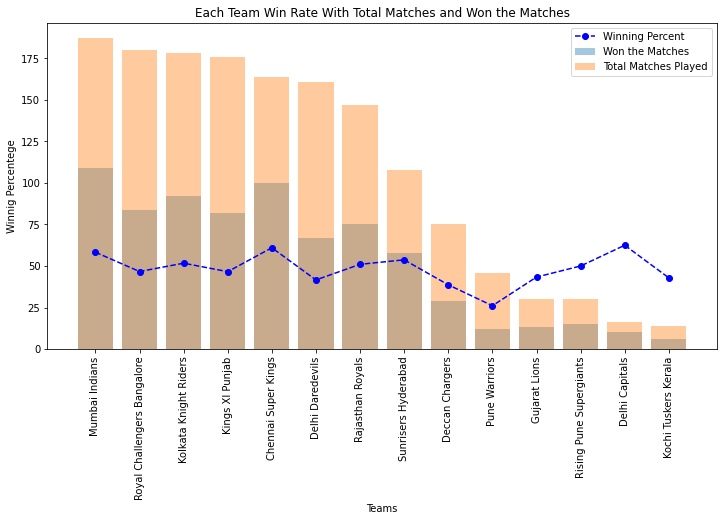

In [ ]:
plt.figure(figsize=(12,6))
plt.title("Each Team Win Rate With Total Matches and Won the Matches")
plt.xlabel("Teams")
plt.ylabel("Winnig Percentege")
plt.xticks(rotation = 90)
plt.plot(mergerd_df.Team,mergerd_df.Win_Rate,'o--b');
plt.bar(mergerd_df.Team,mergerd_df.Won_the_matches,alpha=0.4)
plt.bar(mergerd_df.Team,mergerd_df.total_matches, alpha=0.4)
plt.legend(['Winning Percent','Won the Matches','Total Matches Played']);

##Best Rivalry in the ipl MI vs CSK who won most of the matches on between?





In [ ]:
csk_mi_df = matches_df[((matches_df.team1 == 'Mumbai Indians')&
                               (matches_df.team2 == 'Chennai Super Kings')) |
                              ((matches_df.team1 == 'Chennai Super Kings')&
                              (matches_df.team2 == 'Munmbai Indains'))]
df = csk_mi_df.groupby('winner')[['id']].count()
df = df.sort_values('id',ascending = False).head(10)
df.rename(columns = {'id':'winning_time'},inplace= True)
df                             

,winning_time
winner,
Mumbai Indians,10
Chennai Super Kings,6


##Top 10 Batsmen with highest runs

In [ ]:
runs = deliveries_df.groupby(['batsman'])['batsman_runs'].sum()
runs.sort_values(ascending=False)[:10]

batsman
SK Raina        1627.0
G Gambhir       1491.0
RG Sharma       1371.0
MS Dhoni        1217.0
AC Gilchrist    1182.0
YK Pathan       1143.0
RV Uthappa      1117.0
Yuvraj Singh    1108.0
ML Hayden       1076.0
JH Kallis       1053.0
Name: batsman_runs, dtype: float64

##Different out types and frequency
Here we try to calculate which player tends to loose wicket by what type of dismissal

**Top 10 players who get frequently get catch out and no. of times they got catch out**



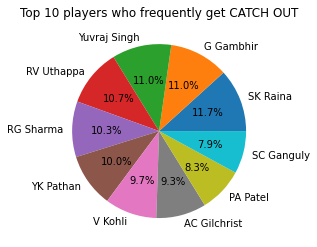

In [ ]:
#players who get catch out
catch_out=deliveries_df[deliveries_df['dismissal_kind']=='caught']
print("**Top 10 players who get frequently get catch out and no. of times they got catch out**\n")
catch_out['batsman'].value_counts()[0:10]
plt.pie(catch_out['batsman'].value_counts()[0:10].values,labels=catch_out['batsman'].value_counts()[0:10].keys(),autopct='%0.1f%%')
plt.title("Top 10 players who frequently get CATCH OUT") 
plt.show()

Top 10 players who get frequently get run out and no. of times they got run out



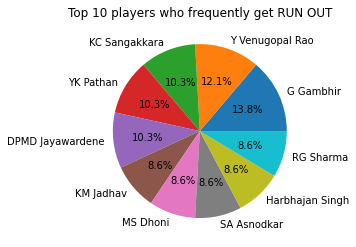

In [ ]:
run_out=deliveries_df[deliveries_df['dismissal_kind']=='run out']
print("Top 10 players who get frequently get run out and no. of times they got run out\n")
(run_out['batsman'].value_counts()[0:10])
plt.pie(run_out['batsman'].value_counts()[0:10].values,labels=run_out['batsman'].value_counts()[0:10].keys(),autopct='%0.1f%%')
plt.title("Top 10 players who frequently get RUN OUT") 
plt.show()

Top 10 players who get frequently get bowled and no. of times they got bowled



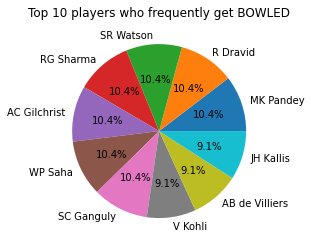

In [ ]:
bowled_ball=deliveries_df[deliveries_df['dismissal_kind']=='bowled']
caught_and_bowled=deliveries_df[deliveries_df['dismissal_kind']=='caught and bowled']
total_bowled=(bowled_ball['batsman'].value_counts().append(caught_and_bowled['batsman'].value_counts()))[0:10]
print("Top 10 players who get frequently get bowled and no. of times they got bowled\n")
(total_bowled)
plt.pie(total_bowled.values,labels=total_bowled.keys(),autopct='%0.1f%%')
plt.title("Top 10 players who frequently get BOWLED") 
plt.show()

Top 10 players who get frequently get stumped out and no. of times they got stumped out



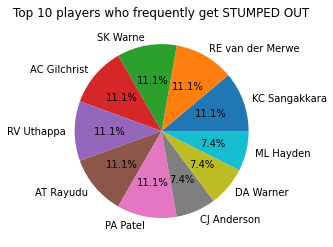

In [ ]:
stumped_out=deliveries_df[deliveries_df['dismissal_kind']=='stumped']
print("Top 10 players who get frequently get stumped out and no. of times they got stumped out\n")
(stumped_out['batsman'].value_counts()[0:10])
plt.pie(stumped_out['batsman'].value_counts()[0:10].values,labels=stumped_out['batsman'].value_counts()[0:10].keys(),autopct='%0.1f%%')
plt.title("Top 10 players who frequently get STUMPED OUT") 
plt.show()